In [0]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [0]:
def gradient_descent(f,x0,eta,epsilon):
   x = sp.symbols("x")
   df = sp.lambdify(x,sp.diff(f(x),x)) # la dérivée de f (fonctionne si f n'est pas trop compliquée)
   result = df(x0);
   while(result >= epsilon):
     xn = x0 - eta*df(x0)
     x0 = xn
     result = df(xn)
   return x0

In [3]:
g = lambda x : x**2-x+1
eta=.01
x0=10
epsilon=.01
gradient_descent(g, x0, eta, epsilon)

0.5049690791479365

In [4]:
f = lambda x : 0.01*(x**4+2*x**3-12*x**2-2*x+6)
gradient_descent(f, x0, eta, epsilon)

1.8881103204483922

In [5]:
eta = .2
epsilon = .1
x0 = 4
gradient_descent(f, x0, eta, epsilon)

2.0683972708749554

As we can observe, the big value of $\epsilon$ allows the gradient descent to stop before it can find the exact local minimum of function $f$

In [6]:
from torchvision import datasets
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(".",download=True,train=True)
test_data = datasets.FashionMNIST(".",download=True,train=False)


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


In [0]:
training_data = [(np.append(np.ndarray.flatten(np.array(img)/255),1), cat) for img, cat in training_data]
test_data = [(np.append(np.ndarray.flatten(np.array(img)/255),1), cat) for img, cat in test_data]
np.random.shuffle(training_data)

$S(\vec w) = \frac{1}{n} \sum_{i} (y_i - \vec w \cdot \vec x_i-b)^2$

In [0]:
def propagate(w, training_data):
  cost = 0
  n = 0
  for (img, cat) in training_data:
    cost += (cat - np.dot(w, img))**2
    n += 1
  cost /= n
  gradw = 0
  for (img, cat) in training_data:
    gradw += -2*(cat - np.dot(w, img)) * img
  gradw /= n
  return (cost, gradw)

In [0]:
def optimize_gd(w,training_data,rate=5e-3,maxiter=1000,info=10, epsilon=.01):
  iter = 0
  list_cost = []
  while(True):
    cost, gradw = propagate(w, training_data)
    iter += 1
    normsq_gradw = np.dot(gradw, gradw)
    if(iter > maxiter or normsq_gradw < epsilon**2):
      break
    if(iter%info == 0):
      print('Iteration ',iter,': Cost= ',cost)
    w = w - rate*gradw
    list_cost.append(cost)
  return (w,list_cost)

In [10]:
size_img = training_data[0][0].size
w0 = np.zeros(size_img)
gdw,gdcost = optimize_gd(w0, training_data[0:10000])
print(gdcost[-1])

Iteration  10 : Cost=  5.064911074009693
Iteration  20 : Cost=  4.005690662862319
Iteration  30 : Cost=  3.7207658980027496
Iteration  40 : Cost=  3.5767046962725253
Iteration  50 : Cost=  3.4822027694376527
Iteration  60 : Cost=  3.411360351554626
Iteration  70 : Cost=  3.3538541741254178
Iteration  80 : Cost=  3.304775887466374
Iteration  90 : Cost=  3.2614747393222423
Iteration  100 : Cost=  3.222377930977762
Iteration  110 : Cost=  3.1864880568028715
Iteration  120 : Cost=  3.1531412171635758
Iteration  130 : Cost=  3.121878033785609
Iteration  140 : Cost=  3.0923695705869636
Iteration  150 : Cost=  3.064372637027081
Iteration  160 : Cost=  3.0377019165082313
Iteration  170 : Cost=  3.012212161305426
Iteration  180 : Cost=  2.9877865838116855
Iteration  190 : Cost=  2.964329138809784
Iteration  200 : Cost=  2.941759289026562
Iteration  210 : Cost=  2.9200083796242158
Iteration  220 : Cost=  2.8990170713391197
Iteration  230 : Cost=  2.878733481757574
Iteration  240 : Cost=  2.85911

In [0]:
def test_params(w, test_data):
  correct = 0
  size = 0
  for (img, cat) in test_data:
    size += 1;
    pred = np.dot(img, w)
    pred = np.around(pred)
    if(pred > 9): pred = 9
    if(pred < 0): pred = 0
    if (pred==cat):
      correct += 1
  return correct/size

In [12]:
test_params(gdw, test_data)

0.359

In [0]:
def optimize_sgd(w,training_data,rate=5e-4,maxiter=1000,info=10, epsilon=.01):
  iter = 0
  list_cost = []
  while(True):
    i = np.random.randint(0, len(training_data))
    cost, gradw = propagate(w, training_data[slice(i,i+1)])
    iter += 1
    normsq_gradw = np.dot(gradw, gradw)
    if(iter > maxiter or normsq_gradw < epsilon**2):
      break
    if(iter%info == 0):
      print('Iteration ',iter,': Cost= ',cost)
    w = w - rate*gradw
    list_cost.append(cost)
  return (w,list_cost)

In [14]:
sgdw,sgdcost = optimize_sgd(w0, training_data[0:10000], info=10)
test_params(sgdw, test_data)

Iteration  10 : Cost=  5.683940182813211
Iteration  20 : Cost=  10.84836975168326
Iteration  30 : Cost=  33.40805346713547
Iteration  40 : Cost=  4.5906394794984084
Iteration  50 : Cost=  1.0371853406706726
Iteration  60 : Cost=  4.0895627515209565
Iteration  70 : Cost=  0.7709112636074706
Iteration  80 : Cost=  0.0012209012981276438
Iteration  90 : Cost=  0.17436190079339078
Iteration  100 : Cost=  11.658838514851322
Iteration  110 : Cost=  4.804954572370802
Iteration  120 : Cost=  0.016197859943664936
Iteration  130 : Cost=  0.08580220973416429
Iteration  140 : Cost=  11.480771412313423
Iteration  150 : Cost=  1.1496273585625079
Iteration  160 : Cost=  6.082198468982974
Iteration  170 : Cost=  0.1091817893662835
Iteration  180 : Cost=  1.159346421187389
Iteration  190 : Cost=  26.447232376497432
Iteration  200 : Cost=  0.390573259465467
Iteration  210 : Cost=  0.5829128011315577
Iteration  220 : Cost=  0.4772473364266194
Iteration  230 : Cost=  0.8530837650560111
Iteration  240 : Cos

0.3074

In [0]:
def optimize_sgdm(w,training_data,rate=5e-4,maxiter=1000,info=10, batch_size=100, epsilon=.01):
  iter = 0
  list_cost = []
  while(True):
    i = np.random.randint(0, len(training_data)-batch_size)
    cost, gradw= propagate(w, training_data[i:(i+batch_size)])
    iter += 1
    normsq_gradw = np.dot(gradw, gradw)
    if(iter > maxiter or normsq_gradw < epsilon**2):
      break
    if(iter%info == 0):
      print('Iteration ',iter,': Cost= ',cost)
    w = w - rate*gradw
    list_cost.append(cost)
  return (w,list_cost)

In [16]:
sgdmw,sgdmcost = optimize_sgdm(w0, training_data[0:10000], maxiter=1000, info=10)
test_params(sgdmw, test_data)

Iteration  10 : Cost=  11.001070497769412
Iteration  20 : Cost=  9.253408360821892
Iteration  30 : Cost=  8.761537192957135
Iteration  40 : Cost=  7.607459167089176
Iteration  50 : Cost=  6.330003023442487
Iteration  60 : Cost=  6.546338090672991
Iteration  70 : Cost=  7.042473989948426
Iteration  80 : Cost=  5.134085620701152
Iteration  90 : Cost=  4.980448902104569
Iteration  100 : Cost=  5.641225337451073
Iteration  110 : Cost=  4.683301322329874
Iteration  120 : Cost=  4.860513707353162
Iteration  130 : Cost=  3.779120623447746
Iteration  140 : Cost=  4.139233811341113
Iteration  150 : Cost=  4.659947416216664
Iteration  160 : Cost=  4.5374958184845635
Iteration  170 : Cost=  3.4776634055343085
Iteration  180 : Cost=  3.8699003471692244
Iteration  190 : Cost=  4.055030333194115
Iteration  200 : Cost=  4.19053790880718
Iteration  210 : Cost=  3.655909294938204
Iteration  220 : Cost=  3.7136120358398905
Iteration  230 : Cost=  4.46167882952501
Iteration  240 : Cost=  3.76469663738838

0.3072

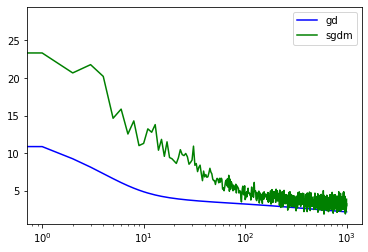

In [17]:

def graph(**kwargs):
  colors = "bgrcmykw:"
  fig, ax = plt.subplots()
  
  for name,color in zip(kwargs,colors):
    ax.semilogx(kwargs[name],color,label=name)
  ax.legend()
  plt.show()

# exemple d'utilisation
graph(gd=gdcost,sgdm=sgdmcost)
# le label de [1,2,3] est "toto1"

In [0]:
def optimize_sgdm_moment(w,training_data,rate=1e-3,mu=0.95,maxiter=40,info=10, batch_size=100, epsilon=.01):
  iter = 0
  list_cost = []
  vw = 0
  while(True):
    i = np.random.randint(0, len(training_data)-batch_size)
    cost, gradw = propagate(w, training_data[i:(i+batch_size)])
    iter += 1
    normsq_gradw = np.dot(gradw, gradw)
    if(iter > maxiter or normsq_gradw < epsilon**2):
      break
    if(iter%info == 0):
      print('Iteration ',iter,': Cost= ',cost)
    vw = mu*vw - rate*gradw
    w = w + vw
    list_cost.append(cost)
  return (w,list_cost)

In [19]:
sgdm_moment_w,sgdm_moment_cost = optimize_sgdm_moment(w0, training_data[0:10000], mu=0.95, maxiter=1000, info=10)
test_params(sgdm_moment_w, test_data)

Iteration  10 : Cost=  3.910358847570474
Iteration  20 : Cost=  9.998359935052903
Iteration  30 : Cost=  3.8363160204146567
Iteration  40 : Cost=  6.563173361251047
Iteration  50 : Cost=  4.012431437656497
Iteration  60 : Cost=  4.527491357639522
Iteration  70 : Cost=  2.1184744596234193
Iteration  80 : Cost=  4.0617940273349324
Iteration  90 : Cost=  2.645097226425299
Iteration  100 : Cost=  3.278250479468149
Iteration  110 : Cost=  3.084852148163374
Iteration  120 : Cost=  3.452065760117028
Iteration  130 : Cost=  2.246691581181762
Iteration  140 : Cost=  2.5269828893940223
Iteration  150 : Cost=  2.679530790686174
Iteration  160 : Cost=  2.2276278938588705
Iteration  170 : Cost=  2.0655261046762403
Iteration  180 : Cost=  2.1150650946637906
Iteration  190 : Cost=  1.9343213277478768
Iteration  200 : Cost=  2.525314212455272
Iteration  210 : Cost=  1.8206999479147448
Iteration  220 : Cost=  1.786830107081281
Iteration  230 : Cost=  2.1067171656977144
Iteration  240 : Cost=  1.9495946

0.3697

In [0]:
def optimize_sg_nesterov(w,training_data,rate=1e-5,mu=0.95,maxiter=500,info=10,epsilon=.01):
  iter = 0
  list_cost = []
  vw = 0
  while(True):
    wtemp = w + mu*vw
    cost, gradw= propagate(wtemp, training_data)
    iter += 1
    normsq_gradw = np.dot(gradw, gradw)
    if(iter > maxiter or normsq_gradw < epsilon**2):
      break
    if(iter%info == 0):
      print('Iteration ',iter,': Cost= ',cost)
    vw = mu*vw - rate*gradw
    w = wtemp + vw
    list_cost.append(cost)
  return (w,list_cost)

In [21]:
sgn_w,sgn_cost = optimize_sg_nesterov(w0, training_data[0:10000], mu=0.95, maxiter=500, info=10)
test_params(sgn_w, test_data)

Iteration  10 : Cost=  23.15317458137455
Iteration  20 : Cost=  14.758524108173047
Iteration  30 : Cost=  10.640508483781286
Iteration  40 : Cost=  10.051449612835098
Iteration  50 : Cost=  9.786993461168638
Iteration  60 : Cost=  8.71858746943649
Iteration  70 : Cost=  7.464858737011904
Iteration  80 : Cost=  6.621712249935741
Iteration  90 : Cost=  6.162987767802625
Iteration  100 : Cost=  5.83067149142797
Iteration  110 : Cost=  5.504112433832666
Iteration  120 : Cost=  5.206741437835373
Iteration  130 : Cost=  4.975168306880511
Iteration  140 : Cost=  4.8032385947043625
Iteration  150 : Cost=  4.665719780996454
Iteration  160 : Cost=  4.547244333642947
Iteration  170 : Cost=  4.444946505727327
Iteration  180 : Cost=  4.358758061921705
Iteration  190 : Cost=  4.286264422550994
Iteration  200 : Cost=  4.223883536793085
Iteration  210 : Cost=  4.169001884029861
Iteration  220 : Cost=  4.120270018413246
Iteration  230 : Cost=  4.076848626859648
Iteration  240 : Cost=  4.037918158284577

0.2851

In [0]:
def optimize_sgdm_nesterov(w,training_data,rate=1e-5,mu=0.95,maxiter=1000,info=10, epsilon=.01, batch_size=100):
  iter = 0
  list_cost = []
  vw = 0
  while(True):
    wtemp = w + mu*vw
    i = np.random.randint(0, len(training_data)-batch_size)
    cost, gradw = propagate(w, training_data[i:(i+batch_size)])
    iter += 1
    normsq_gradw = np.dot(gradw, gradw)
    if(iter > maxiter or normsq_gradw < epsilon**2):
      break
    if(iter%info == 0):
      print('Iteration ',iter,': Cost= ',cost)
    vw = mu*vw - rate*gradw
    w = w + vw
    list_cost.append(cost)
  return (w,list_cost)

In [23]:
sgdmn_w,sgdmn_cost = optimize_sgdm_nesterov(w0, training_data[0:10000])
test_params(sgdmn_w, test_data)

Iteration  10 : Cost=  25.815525167883102
Iteration  20 : Cost=  19.145577825275666
Iteration  30 : Cost=  10.693358734650662
Iteration  40 : Cost=  11.253264808166264
Iteration  50 : Cost=  10.872809864769053
Iteration  60 : Cost=  9.522006376331817
Iteration  70 : Cost=  9.88675406419689
Iteration  80 : Cost=  9.362168777758605
Iteration  90 : Cost=  9.578943718106396
Iteration  100 : Cost=  6.9662754223670005
Iteration  110 : Cost=  7.1782940435967575
Iteration  120 : Cost=  7.188949894584368
Iteration  130 : Cost=  6.70658488221745
Iteration  140 : Cost=  6.520974981445789
Iteration  150 : Cost=  6.8066603064180375
Iteration  160 : Cost=  6.470543477500351
Iteration  170 : Cost=  5.044866835885674
Iteration  180 : Cost=  6.091116379449683
Iteration  190 : Cost=  6.147928104331108
Iteration  200 : Cost=  6.348120773558616
Iteration  210 : Cost=  6.007417219753311
Iteration  220 : Cost=  4.429188826937395
Iteration  230 : Cost=  4.270664936763632
Iteration  240 : Cost=  4.88302319816

0.285

In [0]:
def optimize_sgdm_adam(w,training_data,rate=1e-3,beta1=0.9,beta2=0.999,epsilon=1e-8,maxiter=1000,info=10, batch_size=100):
  list_cost = []
  m = 0
  v = 0
  iter = 0
  while(True):
    i = np.random.randint(0, len(training_data)-batch_size)
    cost, gradw = propagate(w, training_data[i:(i+batch_size)])
    normsq_gradw = np.dot(gradw,gradw)
    iter += 1
    if(iter > maxiter or normsq_gradw < .01**2):
      break
    if(iter%info == 0):
      print('Iteration ',iter,': Cost=', cost)
    m = beta1*m+(1-beta1)*gradw
    v = beta2*v+(1-beta2)*normsq_gradw
    mt = m/(1-beta1**iter)
    vt = v/(1-beta2**iter)
    w = w - rate*mt/(epsilon+np.sqrt(vt))
    list_cost.append(cost)
  return(gradw, list_cost)


In [57]:
sgdm_adam_w,sgdm_adam_cost = optimize_sgdm_adam(w0, training_data[0:10000])
test_params(sgdm_adam_w, test_data)

Iteration  10 : Cost= 31.056127773375316
Iteration  20 : Cost= 24.264315581910523
Iteration  30 : Cost= 27.310512521047826
Iteration  40 : Cost= 26.604784113151577
Iteration  50 : Cost= 25.371477589131743
Iteration  60 : Cost= 25.519051791916375
Iteration  70 : Cost= 23.762100352397674
Iteration  80 : Cost= 20.533924762475667
Iteration  90 : Cost= 22.635147609729266
Iteration  100 : Cost= 18.768348967010276
Iteration  110 : Cost= 21.286326350859028
Iteration  120 : Cost= 15.27825425487577
Iteration  130 : Cost= 22.96517496811518
Iteration  140 : Cost= 19.322833536686133
Iteration  150 : Cost= 21.24969091662852
Iteration  160 : Cost= 18.731307418814513
Iteration  170 : Cost= 21.127875091445404
Iteration  180 : Cost= 20.76933147543524
Iteration  190 : Cost= 16.607175633843866
Iteration  200 : Cost= 20.21947791487739
Iteration  210 : Cost= 16.985972349271634
Iteration  220 : Cost= 16.146400191378895
Iteration  230 : Cost= 17.431483469935685
Iteration  240 : Cost= 13.977450188716235
Iterat

0.0239

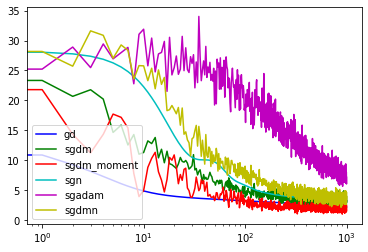

In [59]:
graph(gd=gdcost,sgdm=sgdmcost, sgdm_moment=sgdm_moment_cost, sgn=sgn_cost, sgadam=sgdm_adam_cost, sgdmn=sgdmn_cost)